In [41]:
import pandas as pd  

In [42]:
df = pd.read_csv('SeoulBikeData.csv')

In [43]:
df = df[df["Functioning Day"] == "Yes"]

In [44]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [45]:
# Separate Spring and Winter data
df_spring = df[df['Seasons'] == 'Spring']
df_summer = df[df['Seasons'] == 'Summer']

In [46]:
print("Number of rows in Spring data: ", df_spring.shape[0])
print("Number of rows in Winter data: ", df_summer.shape[0])

Number of rows in Spring data:  2160
Number of rows in Winter data:  2208


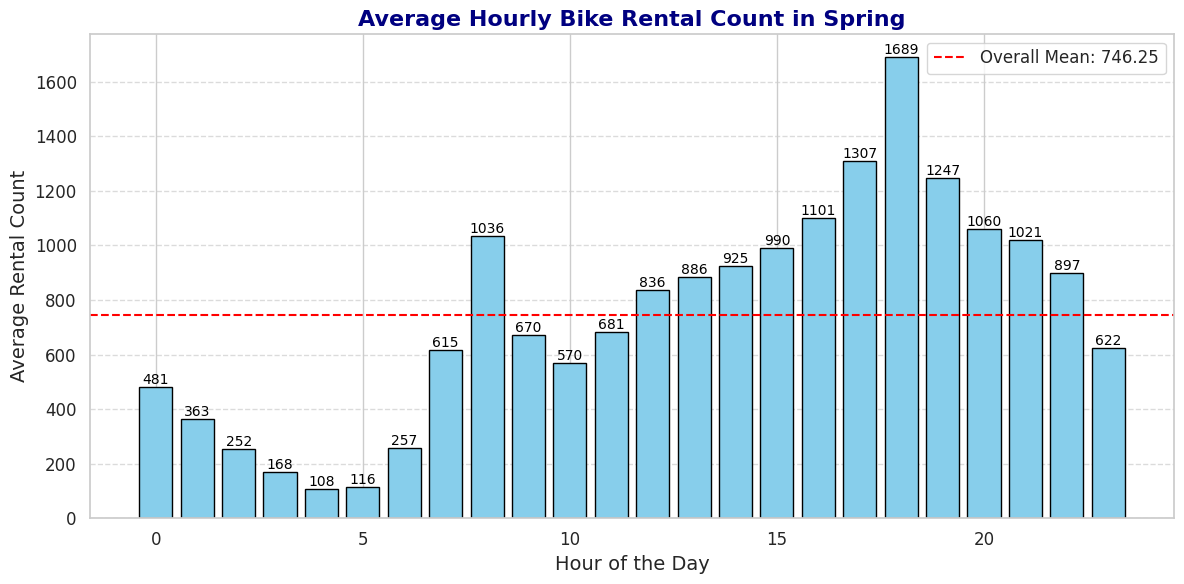

In [88]:
import matplotlib.pyplot as plt

# Group by 'Hour' and calculate the mean 'Rented Bike Count' for spring
avg_hourly_rentals_spring = df_spring.groupby('Hour')['Rented Bike Count'].mean()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_hourly_rentals_spring.index, avg_hourly_rentals_spring, color='skyblue', edgecolor='black')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Title and labels
plt.title('Average Hourly Bike Rental Count in Spring', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Rental Count', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for the mean
mean_value = avg_hourly_rentals_spring.mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {mean_value:.2f}')
plt.legend(fontsize=12, loc='upper right')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


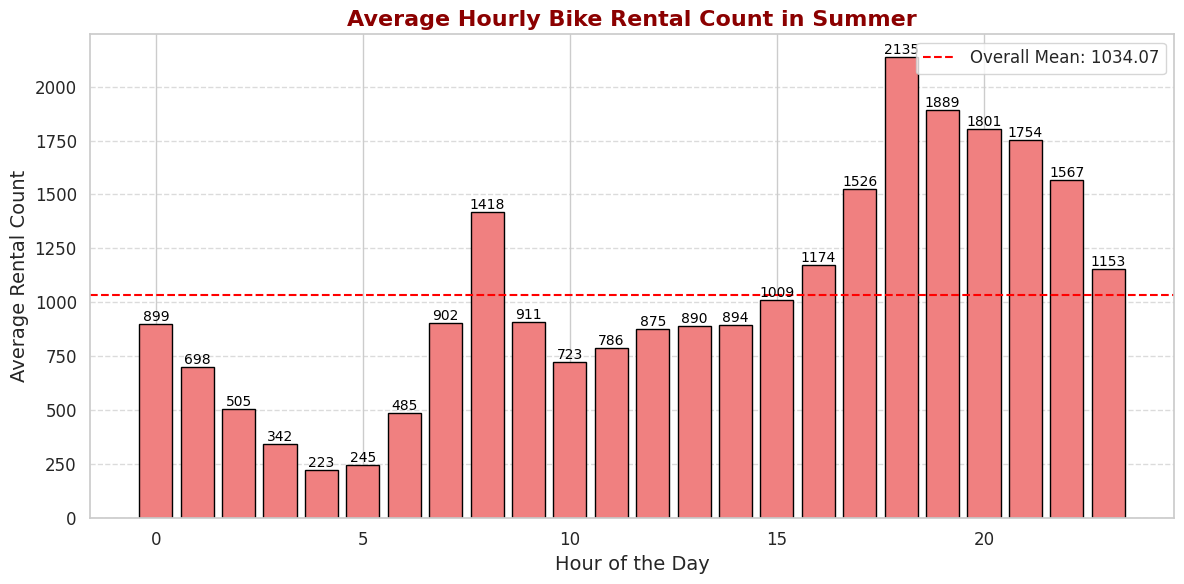

In [89]:
import matplotlib.pyplot as plt

# Group by 'Hour' and calculate the mean 'Rented Bike Count' for summer
avg_hourly_rentals_summer = df_summer.groupby('Hour')['Rented Bike Count'].mean()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_hourly_rentals_summer.index, avg_hourly_rentals_summer, color='lightcoral', edgecolor='black')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10, color='black')

# Title and labels
plt.title('Average Hourly Bike Rental Count in Summer', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Rental Count', fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line for the mean
mean_value = avg_hourly_rentals_summer.mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Overall Mean: {mean_value:.2f}')
plt.legend(fontsize=12, loc='upper right')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()


In [49]:
# Make a dataframe with 2 columns: Spring and summer and rows as average hourly bike rental count
df_spring_avg = df_spring.groupby('Hour')['Rented Bike Count'].mean()
df_summer_avg = df_summer.groupby('Hour')['Rented Bike Count'].mean()


In [50]:
# Merge the two dataframes
df_merged = pd.merge(df_spring_avg, df_summer_avg, on='Hour')
df_merged.columns = ['Spring', 'Summer']



In [51]:
# Add Row sum and Column sum
df_merged.loc['Column Sum'] = df_merged.sum()
df_merged['Row Sum'] = df_merged.sum(axis=1)

print(df_merged)

                  Spring        Summer       Row Sum
Hour                                                
0             481.088889    899.065217   1380.154106
1             363.944444    698.771739   1062.716184
2             252.966667    505.750000    758.716667
3             168.477778    342.673913    511.151691
4             108.222222    223.815217    332.037440
5             116.177778    245.934783    362.112560
6             257.233333    485.836957    743.070290
7             615.288889    902.782609   1518.071498
8            1036.377778   1418.597826   2454.975604
9             670.388889    911.000000   1581.388889
10            570.888889    723.500000   1294.388889
11            681.466667    786.858696   1468.325362
12            836.377778    875.967391   1712.345169
13            886.088889    890.195652   1776.284541
14            925.666667    894.673913   1820.340580
15            990.977778   1009.717391   2000.695169
16           1101.455556   1174.173913   2275.

In [53]:
# Calculate the Expected Values for the Summer Season using formula (Row Total * Column Total) / Grand Total
df_merged["Expected Spring"] = 3
df_merged["Expected Summer"] = 3



In [54]:
df_merged

,Spring,Summer,Row Sum,Expected Spring,Expected Summer
Hour,,,,,
0,481.088889,899.065217,1380.154106,3,3
1,363.944444,698.771739,1062.716184,3,3
2,252.966667,505.750000,758.716667,3,3
3,168.477778,342.673913,511.151691,3,3
4,108.222222,223.815217,332.037440,3,3
5,116.177778,245.934783,362.112560,3,3
6,257.233333,485.836957,743.070290,3,3
7,615.288889,902.782609,1518.071498,3,3
8,1036.377778,1418.597826,2454.975604,3,3


In [55]:
colSum1 = df_merged.loc['Column Sum'][0]
print(colSum1)

colSum2 = df_merged.loc['Column Sum'][1]
print(colSum2)

total = df_merged.loc['Column Sum'][2]
print(total)

17910.1
24817.760869565216
42727.860869565215


/tmp/ipykernel_357753/4156945129.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colSum1 = df_merged.loc['Column Sum'][0]
/tmp/ipykernel_357753/4156945129.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colSum2 = df_merged.loc['Column Sum'][1]
/tmp/ipykernel_357753/4156945129.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = df_merged.loc['Column Sum'][2]


In [56]:
df_merged["Expected Summer"][0]

3

In [57]:
for i in range(24):
    expectedValue1 = df_merged.iloc[i]["Row Sum"] * colSum1 / total
    df_merged["Expected Spring"][i] = expectedValue1
    
    expectedValue2 = df_merged.iloc[i]["Row Sum"] * colSum2 / total
    df_merged["Expected Summer"][i] = expectedValue2
    
df_merged

/tmp/ipykernel_357753/1739927203.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_merged["Expected Spring"][i] = expectedValue1
/tmp/ipykernel_357753/1739927203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,Spring,Summer,Row Sum,Expected Spring,Expected Summer
Hour,,,,,
0,481.088889,899.065217,1380.154106,578.514757,801.639349
1,363.944444,698.771739,1062.716184,445.455324,617.260859
2,252.966667,505.750000,758.716667,318.028825,440.687842
3,168.477778,342.673913,511.151691,214.257810,296.893881
4,108.222222,223.815217,332.037440,139.179066,192.858374
5,116.177778,245.934783,362.112560,151.785557,210.327003
6,257.233333,485.836957,743.070290,311.470383,431.599907
7,615.288889,902.782609,1518.071498,636.325147,881.746351
8,1036.377778,1418.597826,2454.975604,1029.044227,1425.931377


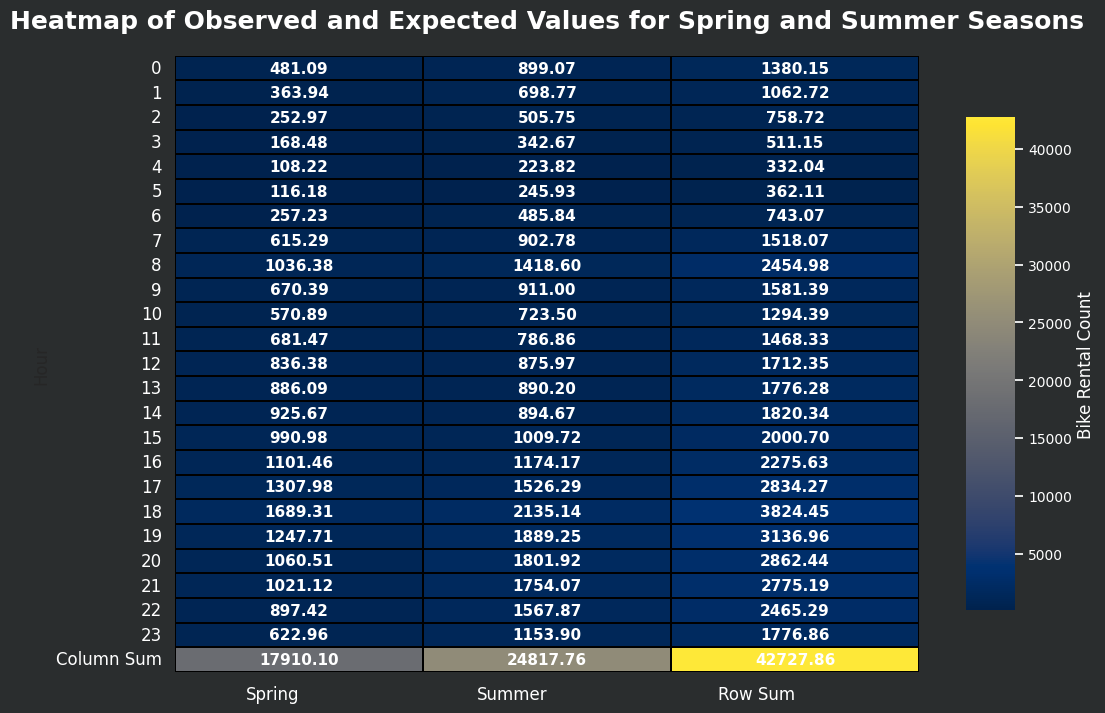

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots to a dark background
sns.set(style="darkgrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap with a different color palette and enhanced styling
heatmap = sns.heatmap(
    df_merged.iloc[:, :3], 
    annot=True, 
    fmt=".2f", 
    cmap='cividis',  # Changed to a vibrant color palette
    linewidths=0.3,  # Subtle grid lines
    linecolor='black',  # Grid line color
    cbar_kws={'shrink': 0.8, 'aspect': 10},  # Customized color bar
    annot_kws={"size": 11, "weight": "bold", "color": "white"},  # Annotation text style
)

# Add a title with custom styling
plt.title('Heatmap of Observed and Expected Values for Spring and Summer Seasons', 
          fontsize=18, weight='bold', color='white', pad=20)

# Rotate the x and y labels for better readability
plt.xticks(ha='right', fontsize=12, color='white')
plt.yticks(rotation=0, fontsize=12, color='white')

# Customize axes and background
heatmap.figure.set_facecolor('#2a2d2e')  # Set background color
heatmap.set_facecolor('#2a2d2e')  # Set the face color of the plot

# Add a color bar with a label
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Bike Rental Count', fontsize=12, color='white')
colorbar.ax.tick_params(labelsize=10, colors='white')

# Show the plot
plt.show()


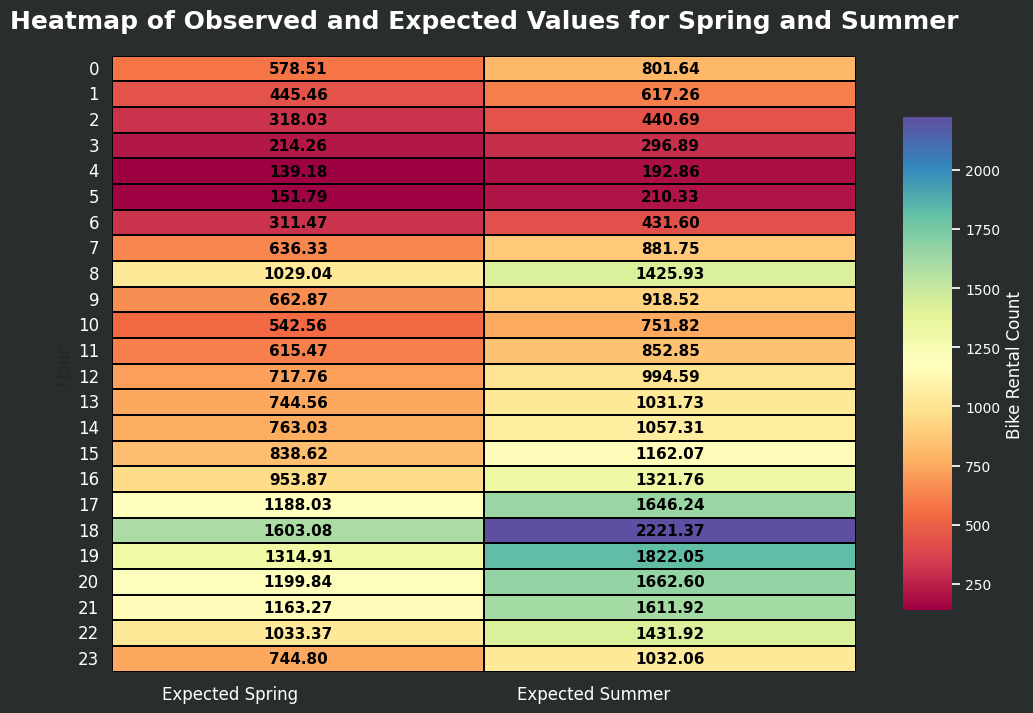

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="darkgrid")

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap for the next two columns with enhanced aesthetics
heatmap = sns.heatmap(
    df_merged.iloc[:-1, 3:5],  # Select the next two columns
    annot=True, 
    fmt=".2f", 
    cmap='Spectral',  # Use a vibrant color palette
    linewidths=0.3,  # Add subtle grid lines
    linecolor='black',  # Grid line color
    cbar_kws={'shrink': 0.8, 'aspect': 10},  # Customize color bar
    annot_kws={"size": 11, "weight": "bold", "color": "black"},  # Annotation text style
)

# Add a title with custom styling
plt.title('Heatmap of Observed and Expected Values for Spring and Summer', 
          fontsize=18, weight='bold', color='white', pad=20)

# Rotate the x and y labels for better readability
plt.xticks(ha='right', fontsize=12, color='white')
plt.yticks(rotation=0, fontsize=12, color='white')

# Customize axes and background
heatmap.figure.set_facecolor('#2a2d2e')  # Set background color
heatmap.set_facecolor('#2a2d2e')  # Set the face color of the plot

# Add a color bar with a label
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Bike Rental Count', fontsize=12, color='white')
colorbar.ax.tick_params(labelsize=10, colors='white')

# Show the plot
plt.show()


In [60]:
# Compute the Test Statistic for Chi-Square Test where Observed is the summer column except for the last row and Expected is the Expected Summer column
T = 0
for i in range(0, 24):
    E = df_merged.iloc[i]["Expected Summer"]
    O = df_merged.iloc[i]["Summer"]
    
    T += ((O - E) ** 2) / E
    
    E = df_merged.iloc[i]["Expected Spring"]
    O = df_merged.iloc[i]["Spring"]
    
    T += ((O - E) ** 2) / E
    
T

536.676606781657

In [61]:
DOF = 24
alpha = 0.05

from scipy.stats import chi2

critical_value = chi2.ppf(1 - alpha, DOF)
critical_value

36.41502850180731

In [62]:
# Compare the Test Statistic with the Critical Value
if T > critical_value:
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject the Null Hypothesis


In [63]:
import scipy.stats as stats

# Assuming T is your Chi-Square test statistic and DOF is the degrees of freedom
p_value = stats.chi2.sf(T, DOF)
print(f"p-value: {p_value}")


p-value: 3.932021483326344e-98


In [64]:
# Use library function to perform the Chi-Square Test
from scipy.stats import chi2_contingency

spring_data = df_merged.iloc[:, 0].values
summer_data = df_merged.iloc[:, 1].values


In [65]:
import numpy as np
import scipy.stats as stats
data = np.array([spring_data, summer_data])

In [66]:
data

array([[  481.08888889,   363.94444444,   252.96666667,   168.47777778,
          108.22222222,   116.17777778,   257.23333333,   615.28888889,
         1036.37777778,   670.38888889,   570.88888889,   681.46666667,
          836.37777778,   886.08888889,   925.66666667,   990.97777778,
         1101.45555556,  1307.97777778,  1689.31111111,  1247.71111111,
         1060.51111111,  1021.12222222,   897.42222222,   622.95555556,
        17910.1       ],
       [  899.06521739,   698.77173913,   505.75      ,   342.67391304,
          223.81521739,   245.93478261,   485.83695652,   902.7826087 ,
         1418.59782609,   911.        ,   723.5       ,   786.85869565,
          875.9673913 ,   890.19565217,   894.67391304,  1009.7173913 ,
         1174.17391304,  1526.29347826,  2135.14130435,  1889.25      ,
         1801.92391304,  1754.06521739,  1567.86956522,  1153.90217391,
        24817.76086957]])

In [67]:
chi2, p, dof, expected = stats.chi2_contingency(data)

In [68]:
print("Chi-Square Statistic: ", chi2)
print("P-Value: ", p)
print("Degrees of Freedom: ", dof)
print("Expected: ", expected)

Chi-Square Statistic:  536.676606781657
P-Value:  3.932021483326344e-98
Degrees of Freedom:  24
Expected:  [[  578.51475725   445.45532428   318.02882464   214.25781004
    139.17906551   151.78555715   311.4703832    636.32514653
   1029.04422707   662.86569378   542.56482696   615.47321903
    717.7582165    744.55947739   763.02630539   838.62495848
    953.86828444  1188.03236553  1603.08341705  1314.90989843
   1199.83768162  1163.26639225  1033.36842855   744.79973893
  17910.1       ]
 [  801.63934903   617.26085929   440.68784203   296.89388078
    192.8583741    210.32700324   431.59990666   881.74635105
   1425.9313768    918.52319511   751.82406193   852.85214329
    994.58695258  1031.72506368  1057.31427432  1162.0702106
   1321.76118416  1646.23889051  2221.36899841  1822.05121268
   1662.59734254  1611.92104737  1431.92335889  1032.05799054
  24817.76086957]]


In [69]:
# critical value
from scipy.stats import chi2
alpha = 0.05
critical_value = chi2.ppf(1 - alpha,24)

print("Critical Value: ", critical_value)

Critical Value:  36.41502850180731


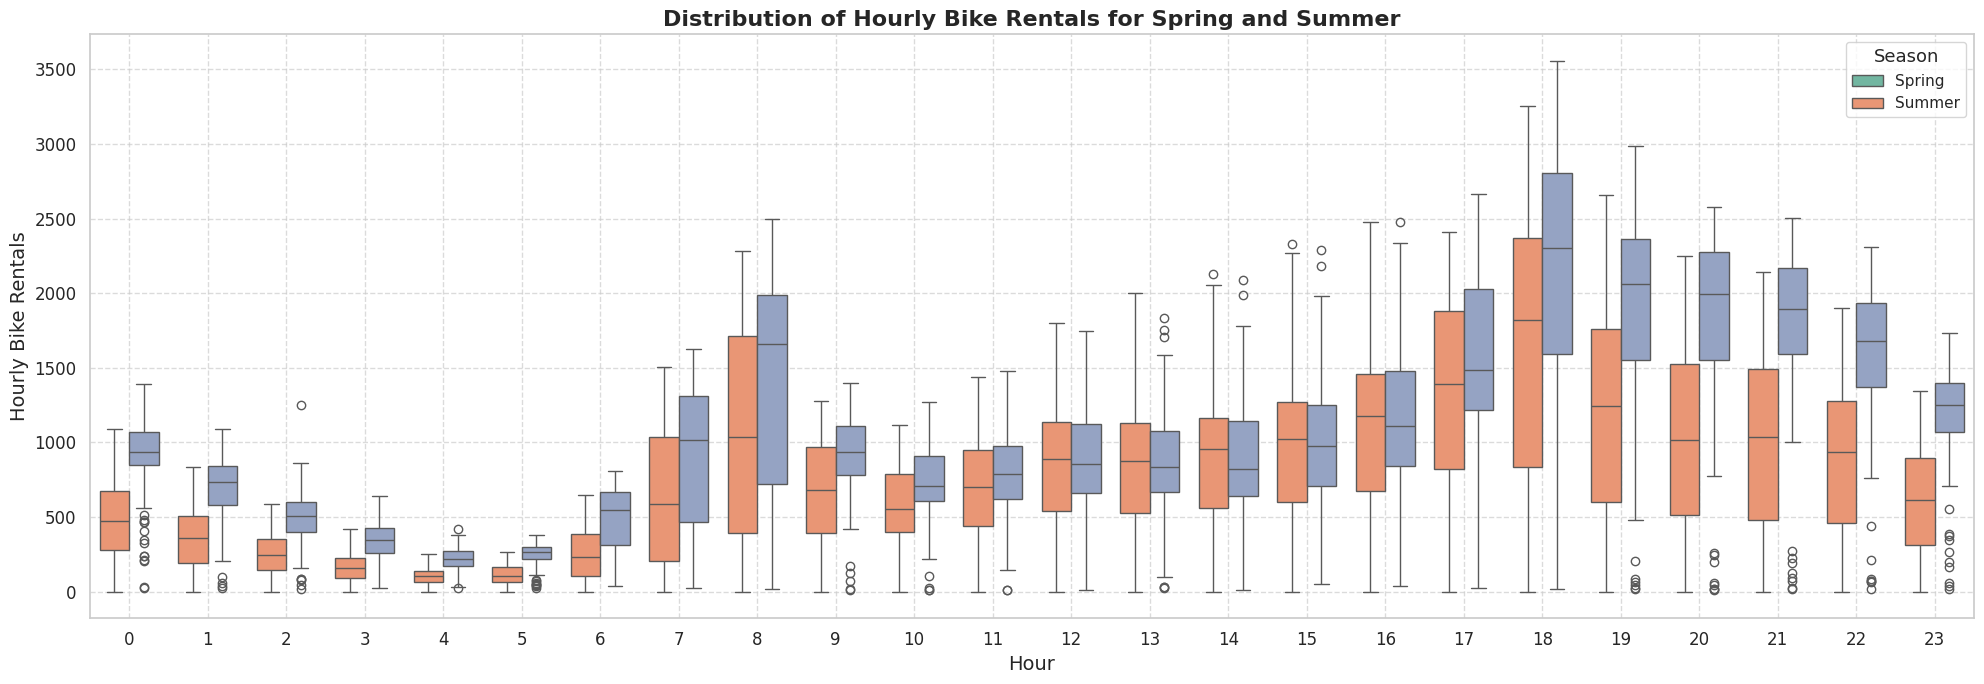

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SeoulBikeData.csv')

# Ensure that the 'Seasons' column is categorical and contains values like 'Spring' and 'Summer'
df['Seasons'] = df['Seasons'].astype('category')

# Filter the data for Spring and Summer
df_spring_summer = df[df['Seasons'].isin(['Spring', 'Summer'])]

# Create the combined box plot for hourly bike rentals
plt.figure(figsize=(20, 7))
sns.set(style="whitegrid")  # Set style to 'whitegrid' for better readability

# Create the box plot with increased box width
ax = sns.boxplot(data=df_spring_summer, x='Hour', y='Rented Bike Count', hue='Seasons', palette='Set2', width=1.5)

# Customizing the plot
plt.title('Distribution of Hourly Bike Rentals for Spring and Summer', fontsize=16, fontweight='bold')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Hourly Bike Rentals', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the legend to only show Spring and Summer
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:2], labels=['Spring', 'Summer'], title='Season', title_fontsize='13', fontsize='11')

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


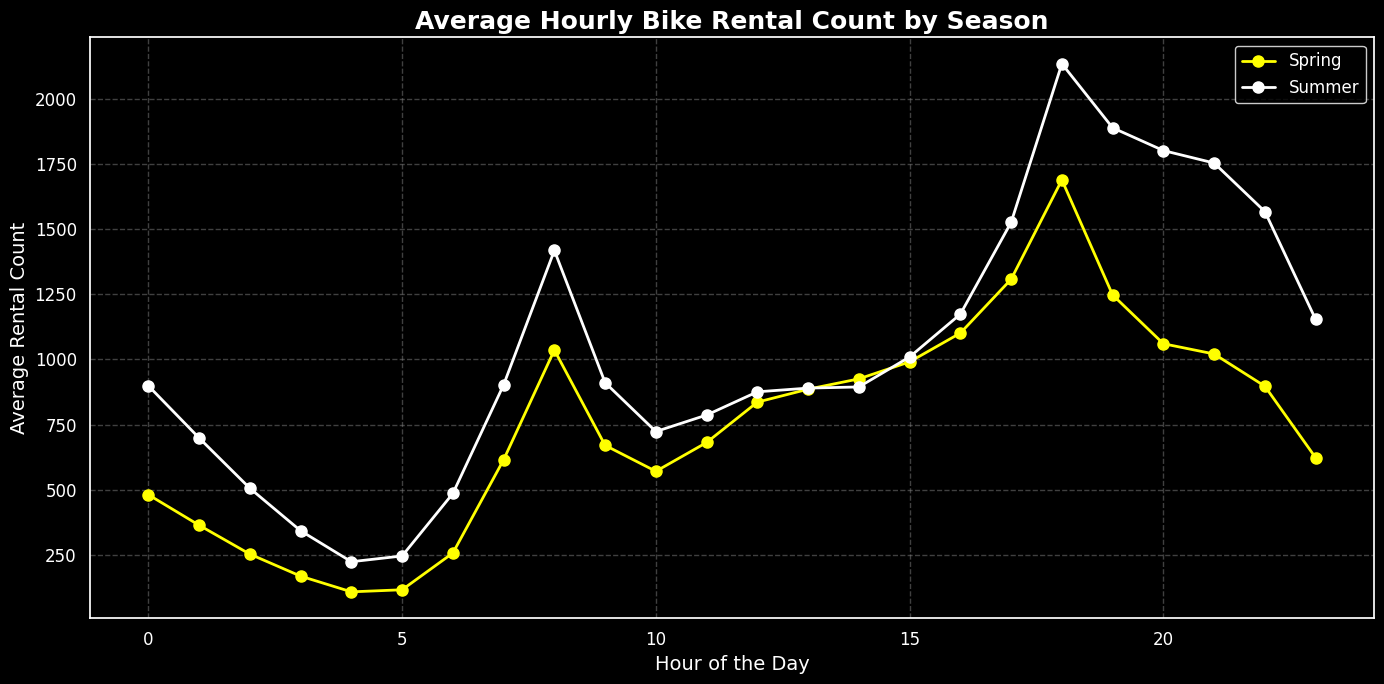

In [97]:
import matplotlib.pyplot as plt

# Calculate average hourly bike rental counts for both seasons
avg_hourly_rentals_spring = df_spring.groupby('Hour')['Rented Bike Count'].mean()
avg_hourly_rentals_summer = df_summer.groupby('Hour')['Rented Bike Count'].mean()

# Set the dark background style
plt.style.use('dark_background')

# Plot
plt.figure(figsize=(14, 7))

# Spring data
plt.plot(avg_hourly_rentals_spring.index, avg_hourly_rentals_spring, color='yellow', marker='o', linestyle='-', linewidth=2, markersize=8, label='Spring', zorder=3)

# Summer data
plt.plot(avg_hourly_rentals_summer.index, avg_hourly_rentals_summer, color='white', marker='o', linestyle='-', linewidth=2, markersize=8, label='Summer', zorder=3)

# Title and labels
plt.title('Average Hourly Bike Rental Count by Season', fontsize=18, fontweight='bold', color='white')
plt.xlabel('Hour of the Day', fontsize=14, color='white')
plt.ylabel('Average Rental Count', fontsize=14, color='white')

# Customize tick parameters
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add gridlines
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

# Add a legend
plt.legend(fontsize=12, loc='upper right', frameon=True, facecolor='black', edgecolor='white')

# Enhance the layout and show plot
plt.tight_layout()
plt.show()
